In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from tqdm.auto import tqdm
import pickle

In [ ]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.3 MB/s eta 0:00:00


# Train and Test Data

In [ ]:
# run for second time
folder_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/"
file_path = "preprocessed_data_lemmatizer.csv"
preprocessed_data_path = folder_path + file_path
train_df = pd.read_csv(preprocessed_data_path)
test_file_path = "preprocessed_test_version_2_lemmatizer.csv"
test_df = pd.read_csv(folder_path + test_file_path)
# /content/drive/MyDrive/Colab Notebooks/DataVerse/preprocessed_test_version_2_lemmatizer.csv

In [ ]:
X_train = train_df["text"]
y_train = train_df["category"]
X_test = test_df["text"]
y_test = test_df["category"]

In [ ]:
# run for second time
# from sklearn.preprocessing import LabelEncoder 
# le = LabelEncoder()
# le.fit(train_df["category"])

# label = le.transform(train_df["category"])

In [ ]:
# save the label encoder of the training data
label_encoder_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/label_encoder.pickle"
# with open(label_encoder_path, 'wb') as file_pi:
#     pickle.dump(le, file_pi)

In [ ]:
label_encoder_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/label_encoder.pickle"

with open(label_encoder_path, 'rb') as handle:
    le = pickle.load(handle)

In [ ]:
category_list = train_df.category.unique()

In [ ]:
label_list = list(range(0, 23))
le.inverse_transform(label_list)

array(['alg-geom', 'astro-ph', 'cond-mat', 'cs', 'econ', 'eess',
       'funct-an', 'gr-qc', 'hep-ex', 'hep-lat', 'hep-ph', 'hep-th',
       'math', 'math-ph', 'nlin', 'nucl-ex', 'nucl-th', 'physics',
       'q-alg', 'q-bio', 'q-fin', 'quant-ph', 'stat'], dtype=object)

In [ ]:
y_train_label = le.transform(y_train)
y_test_label = le.transform(y_test)

In [ ]:
y_test_label

array([20,  2, 12, ...,  3,  5,  3])

In [ ]:
# merge train and test series into train data
len(X_train), len(y_train), len(X_test), len(y_test)

(861232, 861232, 43785, 43785)

In [ ]:
X_train = X_train.append(X_test)
y_train = y_train.append(y_test)

In [ ]:
y_train_label = le.transform(y_train)
y_test_label = le.transform(y_test)

In [ ]:
len(X_train), len(y_train_label), len(X_test), len(y_test_label)

(905017, 905017, 43785, 43785)

# TOKENIZATION

In [ ]:
# run for second time
UNIQUE_WORD_COUNT = 30_000 # Vocab Size
MAX_PAD_LENGTH = 140

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = UNIQUE_WORD_COUNT)

In [ ]:
folder_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/"
tokenizer_path = 'tokenizer.pickle'
with open(folder_path + tokenizer_path, 'rb') as handle:
    tokenizer = pickle.load(handle)

In [ ]:
# run for second time
train_sequences = tokenizer.texts_to_sequences(X_train)
print(train_sequences[0])
train_padded = pad_sequences(train_sequences, maxlen = MAX_PAD_LENGTH, padding = 'post', truncating = 'post')
print(train_padded[0])

[1428, 213, 510, 3154, 1845, 127, 57, 816, 954, 3154, 1845, 484, 52, 1087, 1839, 2159, 1460, 69, 1, 1580, 150, 213, 510, 15, 356, 441, 564, 93, 661, 1378, 4, 209, 59, 191, 52, 99, 205, 2342, 465, 28, 1290, 537, 213, 2060, 347, 189, 98, 1378, 36, 169, 639, 723, 3734, 40, 41, 2282, 3154, 36, 680, 628, 157, 3154, 1794, 106, 181, 2, 825, 336, 3154, 1495, 117, 487, 57, 356, 4455, 584, 123, 146, 4604, 99, 8452, 43, 3409, 213, 2060, 57, 121, 3122, 439, 1896, 8331, 249, 13, 72, 9, 6, 180, 10, 3154, 59, 6024, 292, 1845, 31, 361, 664, 2848, 2, 454, 4, 236, 46, 172, 1, 15, 250]
[1428  213  510 3154 1845  127   57  816  954 3154 1845  484   52 1087
 1839 2159 1460   69    1 1580  150  213  510   15  356  441  564   93
  661 1378    4  209   59  191   52   99  205 2342  465   28 1290  537
  213 2060  347  189   98 1378   36  169  639  723 3734   40   41 2282
 3154   36  680  628  157 3154 1794  106  181    2  825  336 3154 1495
  117  487   57  356 4455  584  123  146 4604   99 8452   43 3409  213


In [ ]:
# run for second time
test_sequences = tokenizer.texts_to_sequences(X_test)
print(test_sequences[0])
test_padded = pad_sequences(test_sequences, maxlen = MAX_PAD_LENGTH, padding = "post", truncating = "post")
print(test_padded[0])

[5821, 1748, 2320, 1685, 194, 1204, 265, 215, 244, 698, 5004, 379, 5004, 411, 7337, 2320, 372, 66, 906, 2435, 27, 323, 21814, 357, 153, 1874, 3875, 153, 5004, 1748, 2320, 4513, 3107, 355, 1685, 194, 1380, 5461, 3039, 3420, 991, 1484, 553, 3875, 153, 1482, 4144, 698, 4031, 1685, 194, 71, 5804, 8312, 1381, 6367, 817, 2890, 279, 7744, 4031, 27, 3321, 90, 279, 730, 4031]
[ 5821  1748  2320  1685   194  1204   265   215   244   698  5004   379
  5004   411  7337  2320   372    66   906  2435    27   323 21814   357
   153  1874  3875   153  5004  1748  2320  4513  3107   355  1685   194
  1380  5461  3039  3420   991  1484   553  3875   153  1482  4144   698
  4031  1685   194    71  5804  8312  1381  6367   817  2890   279  7744
  4031    27  3321    90   279   730  4031     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0    

In [ ]:
y_train_label

array([ 3,  3, 12, ...,  3,  5,  3])

In [ ]:
from keras.utils import np_utils
y_train_enc = np_utils.to_categorical(y_train_label)
N_CLASSES = len(y_train_enc[0])
y_test_enc = np_utils.to_categorical(y_test_label, num_classes=N_CLASSES)

# Transformer Block

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [ ]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [ ]:
embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer
OUTPUT_DIM = N_CLASSES

inputs = layers.Input(shape=(MAX_PAD_LENGTH,))
embedding_layer = TokenAndPositionEmbedding(MAX_PAD_LENGTH, UNIQUE_WORD_COUNT, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(OUTPUT_DIM, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
import tensorflow_addons as tfa

In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
n_classes = N_CLASSES
model.compile(
      loss='categorical_crossentropy', 
      optimizer=optimizer, 
      metrics=[tf.keras.metrics.CategoricalAccuracy(),
                tfa.metrics.F1Score(num_classes=n_classes, average='macro'),
                tfa.metrics.FBetaScore(beta=2.0, num_classes=n_classes, average='macro')])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 140)]             0         
                                                                 
 token_and_position_embeddin  (None, 140, 32)          964480    
 g_1 (TokenAndPositionEmbedd                                     
 ing)                                                            
                                                                 
 transformer_block_1 (Transf  (None, 140, 32)          10656     
 ormerBlock)                                                     
                                                                 
 global_average_pooling1d_1   (None, 32)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_6 (Dropout)         (None, 32)                0   

In [ ]:
history = model.fit(
    train_padded, y_train_enc, batch_size=128, epochs=5, validation_data=(test_padded, y_test_enc)
)

Epoch 1/5
7071/7071 [==============================] - 90s 12ms/step - loss: 0.9744 - categorical_accuracy: 0.6649 - f1_score: 0.3398 - fbeta_score: 0.3312 - val_loss: 0.7893 - val_categorical_accuracy: 0.7025 - val_f1_score: 0.3891 - val_fbeta_score: 0.3828
Epoch 2/5
7071/7071 [==============================] - 82s 12ms/step - loss: 0.8526 - categorical_accuracy: 0.6866 - f1_score: 0.3835 - fbeta_score: 0.3752 - val_loss: 0.7504 - val_categorical_accuracy: 0.7092 - val_f1_score: 0.4105 - val_fbeta_score: 0.4046
Epoch 3/5
7071/7071 [==============================] - 83s 12ms/step - loss: 0.8217 - categorical_accuracy: 0.6913 - f1_score: 0.3938 - fbeta_score: 0.3848 - val_loss: 0.7289 - val_categorical_accuracy: 0.7123 - val_f1_score: 0.4252 - val_fbeta_score: 0.4167
Epoch 4/5
7071/7071 [==============================] - 81s 12ms/step - loss: 0.8017 - categorical_accuracy: 0.6940 - f1_score: 0.4015 - fbeta_score: 0.3919 - val_loss: 0.7160 - val_categorical_accuracy: 0.7132 - val_f1_scor

In [ ]:
model_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/Transformer/transformer_model_v3"
# model.save(model_path)

In [ ]:
import pickle

In [ ]:
history_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/TransformerV1/transformer_model_v3.history"
# with open(history_path, 'wb') as file_pi:
#     pickle.dump(history.history, file_pi)

In [ ]:
# read the history
with open(history_path, "rb") as file_pi:
    history = pickle.load(file_pi)

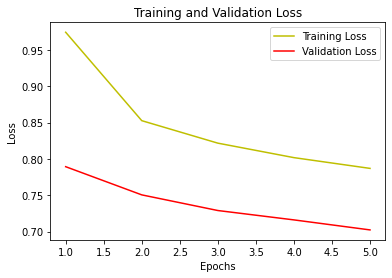

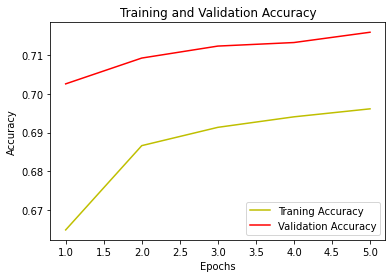

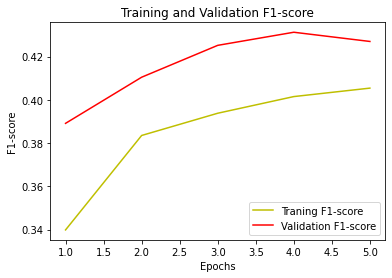

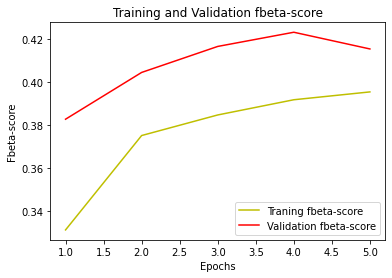

In [ ]:
def historyVisualization(history):
  #plot the training and validation accuracy and losss at each epoch
  loss = history['loss']
  val_loss = history['val_loss']
  epochs = range(1, len(loss) + 1)
  plt.plot(epochs, loss, 'y', label="Training Loss")
  plt.plot(epochs, val_loss, 'r', label = "Validation Loss")
  plt.title('Training and Validation Loss')
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

  print()

  acc = history['categorical_accuracy'] 
  val_acc = history['val_categorical_accuracy']
  plt.plot(epochs, acc, 'y', label = "Traning Accuracy")
  plt.plot(epochs, val_acc, 'r', label = "Validation Accuracy")
  plt.title("Training and Validation Accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()

  print()

  acc = history['f1_score'] 
  val_acc = history['val_f1_score']
  plt.plot(epochs, acc, 'y', label = "Traning F1-score")
  plt.plot(epochs, val_acc, 'r', label = "Validation F1-score")
  plt.title("Training and Validation F1-score")
  plt.xlabel("Epochs")
  plt.ylabel("F1-score")
  plt.legend()
  plt.show()

  print()
  
  acc = history['fbeta_score'] 
  val_acc = history['val_fbeta_score']
  plt.plot(epochs, acc, 'y', label = "Traning fbeta-score")
  plt.plot(epochs, val_acc, 'r', label = "Validation fbeta-score")
  plt.title("Training and Validation fbeta-score")
  plt.xlabel("Epochs")
  plt.ylabel("Fbeta-score")
  plt.legend()
  plt.show()

historyVisualization(history)

# Classification report

In [1]:
from keras.models import load_model
import pandas as pd
import pickle
import numpy as np

In [2]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 59.7 MB/s eta 0:00:00


In [3]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
import tensorflow as tf
import tensorflow_addons as tfa

In [4]:
n_classes = 23
MAX_PAD_LENGTH = 140

In [5]:
model_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/Transformer/transformer_model_v3"
loaded_model = load_model(model_path, custom_objects={"categorical_accuracy" : tf.keras.metrics.CategoricalAccuracy(), 
                                                               "f1_score" :  tfa.metrics.F1Score(num_classes=n_classes, average='macro'), 
                                                               "fbeta_score" : tfa.metrics.FBetaScore(beta=2.0, num_classes=n_classes, average='macro')
                                                               })

In [6]:
test_file_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/preprocessed_test_version_2_lemmatizer.csv" 
test_df = pd.read_csv(test_file_path)

In [7]:
folder_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/"
tokenizer_path = 'tokenizer.pickle'
with open(folder_path + tokenizer_path, 'rb') as handle:
    tokenizer = pickle.load(handle)

In [8]:
X_test = test_df.text

In [9]:
test_sequences = tokenizer.texts_to_sequences(X_test)
print(test_sequences[0])
test_padded = pad_sequences(test_sequences, maxlen = MAX_PAD_LENGTH, padding = 'post', truncating = 'post')
print(test_padded[0])

[5821, 1748, 2320, 1685, 194, 1204, 265, 215, 244, 698, 5004, 379, 5004, 411, 7337, 2320, 372, 66, 906, 2435, 27, 323, 21814, 357, 153, 1874, 3875, 153, 5004, 1748, 2320, 4513, 3107, 355, 1685, 194, 1380, 5461, 3039, 3420, 991, 1484, 553, 3875, 153, 1482, 4144, 698, 4031, 1685, 194, 71, 5804, 8312, 1381, 6367, 817, 2890, 279, 7744, 4031, 27, 3321, 90, 279, 730, 4031]
[ 5821  1748  2320  1685   194  1204   265   215   244   698  5004   379
  5004   411  7337  2320   372    66   906  2435    27   323 21814   357
   153  1874  3875   153  5004  1748  2320  4513  3107   355  1685   194
  1380  5461  3039  3420   991  1484   553  3875   153  1482  4144   698
  4031  1685   194    71  5804  8312  1381  6367   817  2890   279  7744
  4031    27  3321    90   279   730  4031     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0    

In [10]:
y_test_predict = loaded_model.predict(test_padded)

1369/1369 [==============================] - 12s 7ms/step


In [11]:
y_predicted = np.argmax(y_test_predict, axis = 1)

In [13]:
label_encoder_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/label_encoder.pickle"

with open(label_encoder_path, 'rb') as handle:
    le = pickle.load(handle)

In [14]:
y_true = le.transform(test_df.category)
y_true

array([20,  2, 12, ...,  3,  5,  3])

In [16]:
from sklearn.metrics import classification_report, accuracy_score, f1_score
print(accuracy_score(y_true, y_predicted))
print(f1_score(y_true, y_predicted, average = "macro"))
print(classification_report(y_true, y_predicted))

0.7158159186936165
0.49106363787588353
              precision    recall  f1-score   support

           1       0.80      0.93      0.86      3012
           2       0.74      0.83      0.78      3652
           3       0.73      0.91      0.81     13308
           4       0.56      0.31      0.40       199
           5       0.46      0.04      0.07      1734
           7       0.49      0.56      0.52       794
           8       0.58      0.28      0.38       375
           9       0.46      0.18      0.26       127
          10       0.52      0.62      0.57       979
          11       0.52      0.33      0.41       996
          12       0.80      0.82      0.81      9059
          13       0.00      0.00      0.00       608
          14       0.52      0.24      0.33       305
          15       0.44      0.30      0.36       186
          16       0.51      0.37      0.43       342
          17       0.66      0.60      0.63      3390
          19       0.57      0.53      0.5

# Submission Data

In [ ]:
predicted_labels = le.inverse_transform(y_predicted)

In [ ]:
submission_df = test_df.copy(deep = True)
submission_df.head()

,id,category,text
0,2107.01095,q-fin,vote library bond principal component explorat...
1,1906.08519,cond-mat,crystal structure magnetic property 5d transit...
2,2105.05523,math,trimmed extreme value estimator censored heavy...
3,1906.08731,cs,gray box monitoring hyperproperties extended v...
4,1703.08445,math,sectional curvature along central configuratio...


In [ ]:
submission_df.category = predicted_labels
submission_df.head()

,id,category,text
0,2107.01095,cs,vote library bond principal component explorat...
1,1906.08519,cond-mat,crystal structure magnetic property 5d transit...
2,2105.05523,stat,trimmed extreme value estimator censored heavy...
3,1906.08731,cs,gray box monitoring hyperproperties extended v...
4,1703.08445,math,sectional curvature along central configuratio...


In [ ]:
submission_df.drop("text", axis = 1, inplace = True)
submission_df.head()

,id,category
0,2107.01095,cs
1,1906.08519,cond-mat
2,2105.05523,stat
3,1906.08731,cs
4,1703.08445,math


In [ ]:
submission_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/Transformer/submission_transformer_v3.csv"
submission_df.to_csv(submission_path,index = False)

# Non Duplicated Test File

In [ ]:
test_file_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/preprocessed_test_not_duplicate.csv" 
test_df = pd.read_csv(test_file_path)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11381 entries, 0 to 11380
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11381 non-null  object
 1   category  11381 non-null  object
 2   text      11381 non-null  object
dtypes: object(3)
memory usage: 266.9+ KB


In [ ]:
folder_path = "/content/drive/MyDrive/Colab Notebooks/DataVerse/"
tokenizer_path = 'tokenizer.pickle'
with open(folder_path + tokenizer_path, 'rb') as handle:
    tokenizer = pickle.load(handle)

X_test = test_df.text
test_sequences = tokenizer.texts_to_sequences(X_test)
print(test_sequences[0])
test_padded = pad_sequences(test_sequences, maxlen = MAX_PAD_LENGTH, padding = 'post', truncating = 'post')
print(test_padded[0])

[259, 16, 482, 2116, 9692, 1555, 259, 16, 2762, 51, 482, 3853, 1596, 51, 6440, 370, 239, 1181, 26, 3220, 12, 3787, 1596, 51, 899, 898, 519, 17, 276, 482, 2116]
[ 259   16  482 2116 9692 1555  259   16 2762   51  482 3853 1596   51
 6440  370  239 1181   26 3220   12 3787 1596   51  899  898  519   17
  276  482 2116    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0]


In [ ]:
y_test_predict = loaded_model.predict(test_padded)
y_predicted = np.argmax(y_test_predict, axis = 1)
y_true = le.transform(test_df.category)
from sklearn.metrics import classification_report
print(classification_report(y_true, y_predicted))

356/356 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           1       0.94      0.99      0.96      1136
           2       0.90      0.95      0.92      1127
           3       0.87      0.97      0.92      3020
           4       0.79      0.45      0.58        33
           5       0.82      0.13      0.22       247
           7       0.82      0.83      0.82       196
           8       0.82      0.79      0.81        63
           9       1.00      0.24      0.38        21
          10       0.86      0.90      0.88       298
          11       0.94      0.78      0.85       241
          12       0.96      0.95      0.95      2929
          13       0.00      0.00      0.00         4
          14       0.77      0.54      0.63        37
          15       0.73      0.63      0.68        35
          16       0.86      0.76      0.80        87
          17       0.84      0.80      0.82       871
          19       0.81   

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
